In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---

#### **Problem #1.1**
This dataset contains historical statistics for NBA (National Basketball Association) players, sourced from Basketball-Reference.com. The data includes a wide range of metrics from basic statistics like games played and minutes played to more advanced statistics like player efficiency ratings. While the dataset is rich and detailed, we are only focusing on a subset of the available columns to introduce you to the basics of data exploration and manipulation.

<br>

**Even if you're not familiar with basketball, understanding the data columns should still be relatively straightforward. Here's what each column we're using means:**

- `player_id`: A unique ID assigned by Basketball-Reference.com to each player.

- `name_common`: The name of the basketball player.

- `year_id`: This refers to the NBA season year. For example, the 2019-2020 NBA season would be represented as "2000".

- `age`: The age of the player as of February 1 of that season.

- `team_id`: The abbreviation for the team that the player played for during that season. Each NBA team has a unique abbreviation, like 'LAL' for the Los Angeles Lakers.

- `G`: Games Played - The number of games the player participated in during that season.

- `Min`: Minutes Played - The total number of minutes the player was on the court during the season.

- `MPG`: Minutes Per Game - This is the average number of minutes the player was on the court per game during the season. It's calculated as Min divided by G.

- `FT%`: Free Throw Percentage - This is the percentage of free throws the player made successfully. A free throw is an opportunity given to a player to score one point, unopposed, from a position 15 feet from the basket. It's calculated as Free Throws Made divided by Free Throws Attempted.

<br>

**Run the code cell below to load the data.**

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv'
nba_df = pd.read_csv(url)
nba_df = nba_df[['player_id', 'name_common', 'year_id', 'age', 'team_id', 'G', 'Min', 'MPG', 'FT%']]
nba_df = nba_df.dropna()
nba_df

,player_id,name_common,year_id,age,team_id,G,Min,MPG,FT%
808,youngtr01,Trae Young,2019,20,ATL,81,2503,30.9,82.9
809,huertke01,Kevin Huerter,2019,20,ATL,75,2048,27.3,73.2
810,bembrde01,DeAndre' Bembry,2019,24,ATL,82,1931,23.5,64.0
811,collijo01,John Collins,2019,21,ATL,61,1829,30.0,76.3
812,bazemke01,Kent Bazemore,2019,29,ATL,67,1643,24.5,72.6
...,...,...,...,...,...,...,...,...,...
28163,weissbo01,Bob Weiss,1977,34,WSB,62,768,12.4,78.4
28164,riordmi01,Mike Riordan,1977,31,WSB,49,289,5.9,73.3
28165,weathni01,Nick Weatherspoon,1977,26,WSB,11,152,13.8,62.5
28166,pacejo01,Joe Pace,1977,23,WSB,30,119,4.0,55.2


#### **Problem #1.2**

How many players are included in this dataset?

In [3]:
nba_df.shape
print('Dataset has ', nba_df.shape[0], 'players')

Dataset has  19489 players


#### **Problem #1.3**

How many columns are in this DataFrame?

In [4]:
nba_df.shape
print('Dataframe has ', nba_df.shape[1], 'columns')

Dataframe has  9 columns


#### **Problem #1.4**
How many columns contain numerical data?

In [5]:
nba_df.dtypes

player_id       object
name_common     object
year_id          int64
age              int64
team_id         object
G                int64
Min              int64
MPG            float64
FT%            float64
dtype: object

#### **Problem #1.5**

How many different NBA teams (`team_id`) are included in the dataset?

In [6]:
len(nba_df['team_id'].unique())

42

#### **Problem #1.6**

What is the most common `age` among all players in the dataset?

In [7]:
nba_df['age'].value_counts()

23    2121
24    2114
25    1904
26    1794
27    1616
22    1469
28    1417
29    1250
30    1148
31     946
32     783
21     607
33     603
34     453
20     324
35     302
36     202
37     136
19     124
38      88
39      46
40      19
18      12
41       5
42       4
44       1
43       1
Name: age, dtype: int64


#### **Problem #1.7**

Complete the code below to output players above the age of 35.

In [8]:
older_players = nba_df[nba_df['age'] > 35]

older_players['player_id']

816      cartevi01
902      parketo01
950      korveky01
970      nowitdi01
1022     caldejo01
           ...    
25091    hayesel01
25580    hayesel01
26757    silaspa01
27284    havlijo01
27735    havlijo01
Name: player_id, Length: 502, dtype: object


#### **Problem #1.8**

Extract the following columns: `player_id`, `age`, `FT%`

In [9]:
nba_df[['player_id', 'age', 'FT%']]

,player_id,age,FT%
808,youngtr01,20,82.9
809,huertke01,20,73.2
810,bembrde01,24,64.0
811,collijo01,21,76.3
812,bazemke01,29,72.6
...,...,...,...
28163,weissbo01,34,78.4
28164,riordmi01,31,73.3
28165,weathni01,26,62.5
28166,pacejo01,23,55.2


####**Problem #1.9**
Identify players with a Free-Throw Percentage (`FT%`) greater than 90%.

In [10]:
len(nba_df[nba_df['FT%'] > 90])



967

#### **Problem #1.10**

What is the average age of the players in the dataset?

In [11]:
nba_df['age'].mean()

26.722407511929806

#### **Problem #1.11**

What is the median value for the Minutes Per Game (`MPG`) across all players?

In [12]:
nba_df['MPG'].median()

19.5

#### **Problem #1.12**

Calculate the sum of minutes played (`Min`) for all players in the dataset.

In [13]:
nba_df["Min"].sum()

22847833

<a name="p2"></a>

---
## **Part 2: Data Visualizations**
---

<a name="p2.1"></a>

---
### **Part 2.1: Scatter Plots**
---

#### **Problem #2.1.1**

Create a scatter plot given the array `x_range` and array `y_range`. Add a title called "Random Variable Vs. Random Variable" to the graph. And add x- and y-labels that say "Random X" and "Random Y", respectively.

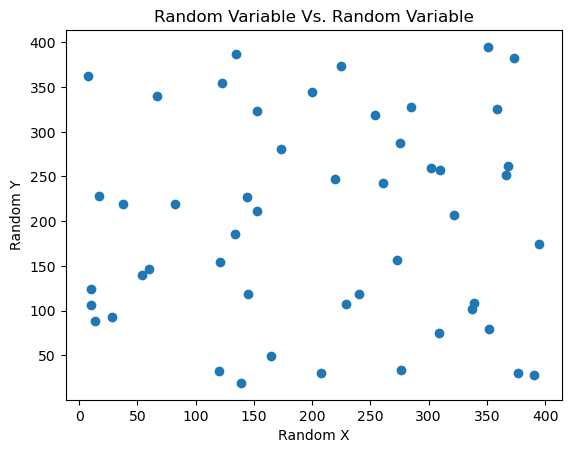

In [14]:
x_range = np.random.randint(400, size=50)
y_range = np.random.randint(400, size=50)


plt.scatter(x_range, y_range)
plt.title('Random Variable Vs. Random Variable')
plt.xlabel('Random X')
plt.ylabel('Random Y')
plt.show()
# add scatter plot


#### **Problem #2.1.2**

Given the following scatter plot, add the following labels and title:
* `Title`: "Distance vs Workout Duration"
* `X-axis`: "Distance (km)"
* `Y-axis`: "Workout Duration (min)"

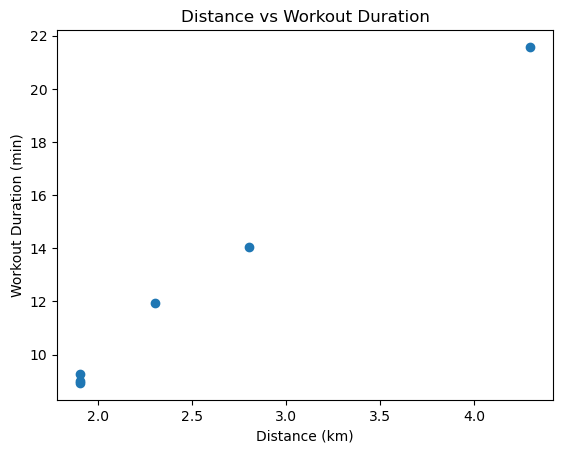

In [16]:
workout_df = pd.DataFrame({"date": ["10/17/21", "11/04/21", "11/18/21", "11/23/21", "11/28/21", "11/29/21"],
           "distance_km": [4.3, 1.9, 1.9, 1.9, 2.3, 2.8],
           "duration_min": [21.58, 9.25, 9.0, 8.93, 11.94, 14.05],
           "delta_last_workout":[1, 18, 14, 5, 5, 1],
           "day_category": [0, 1, 1, 0, 0, 0]})

# creating scatter
x = workout_df['distance_km']
y = workout_df['duration_min']


plt.scatter(x, y)
plt.title("Distance vs Workout Duration")
plt.xlabel("Distance (km)")
plt.ylabel("Workout Duration (min)")

plt.show()

#### **Problem #2.1.3**

Create a scatter plot for the following data. Make the title and labels the following:
* `Title`: "Age vs. height in teenagers"
* `X-axis`: "Age"
* `Y-axis`: "Height (in)"

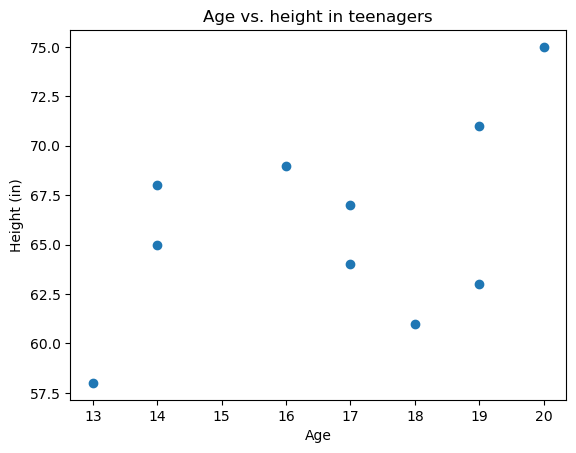

In [17]:
age = [14, 14, 13, 18, 17, 20, 17, 16, 19, 19]
height = [65, 68, 58, 61, 64, 75, 67, 69, 71, 63] #in inches
# Scatter Plot

plt.scatter(age, height)
plt.xlabel("Age")
plt.ylabel("Height (in)")
plt.title("Age vs. height in teenagers")

plt.show()

<a name="p2.2"></a>

---
### **Part 2.2: Line Plots**
---

#### **Problem #2.2.1**

Create a line plot for the following data. Add a title called "Bike Rideshare Activity" with x-axis and y-axis labels called "Month" and "Bike Trips", respectively.

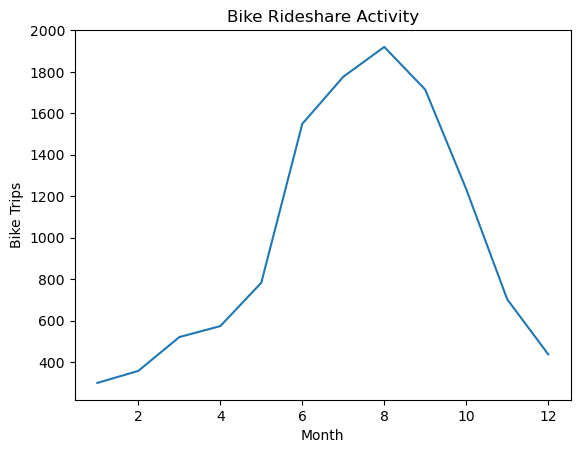

In [18]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trips = [300, 358, 521, 574, 783, 1549, 1776, 1920, 1714, 1234, 703, 438]

# Line Plot
plt.plot(months, trips)
plt.xlabel("Month")
plt.ylabel("Bike Trips")
plt.title("Bike Rideshare Activity")

plt.show()

#### **Problem #2.2.2**

Create a line plot for the following data. Add a title called "Unemployment rate over the years" with x-axis and y-axis labels called "Year" and "Unemployment", respectively.

In [19]:
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

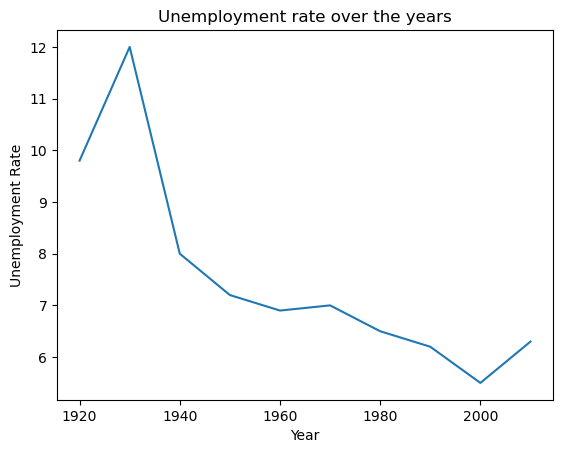

In [20]:
# Line Plot

plt.plot(Year, Unemployment_Rate)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment rate over the years")

plt.show()

#### **Problem #2.2.3**

The information below contains data related to how many people have visited Disney parks globally. Create a line plot to show how the number of visits have changed between 2017 to 2020. Make sure you add in helpful labels and a title.

**Note:** Visitors is in millions. For example, in 2017, 150 million people visited Disney parks globally.

In [21]:
year = [2017, 2018, 2019, 2020]
visitors = [150, 157, 155.991, 43.525]

Text(0.5, 1.0, 'How the pandemic affected Disney Parks ticket sales')

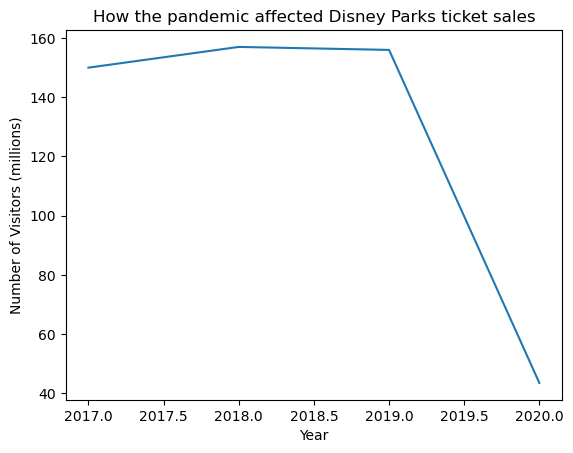

In [22]:
# Line Plot
plt.plot(year, visitors)
plt.xlabel('Year')
plt.ylabel('Number of Visitors (millions)')
plt.title('How the pandemic affected Disney Parks ticket sales')

<a name="p2.3"></a>

---
### **Part 2.3: Bar Plots**
---

#### **Problem #2.3.1**

Now, plot the same data as above, but using a bar plot. In some cases, it may not be clear which plot will be best until you see your options!

In [23]:
year = ['2017', '2018', '2019', '2020']
visitors = [150, 157, 155.991, 43.525]

Text(0.5, 1.0, 'How the pandemic affected Disney Parks ticket sales')

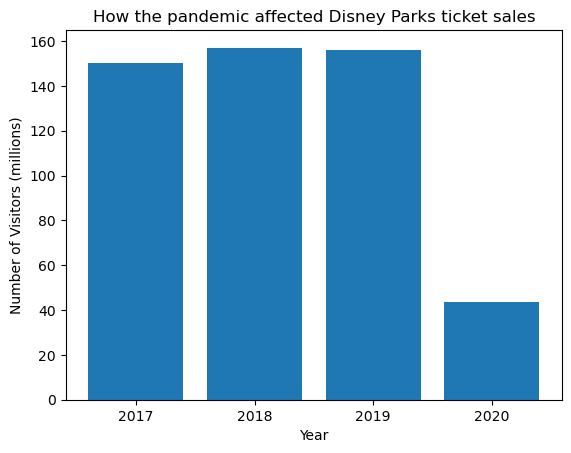

In [24]:
# Bar Plot
plt.bar(year, visitors)
plt.xlabel('Year')
plt.ylabel('Number of Visitors (millions)')
plt.title('How the pandemic affected Disney Parks ticket sales')

#### **Problem #2.3.2**

Create a bar plot for the following data. Add a title called "Favorite Types of Drinks" with x-axis and y-axis labels called "Drink" and "Number of People", respectively.

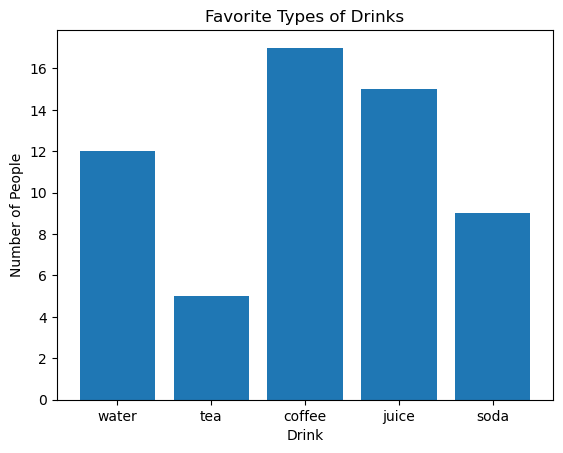

In [25]:
drinks = ["water", "tea", "coffee", "juice", "soda"]
people = [12, 5, 17, 15, 9]

# Bar Plot
plt.bar(drinks, people)
plt.xlabel("Drink")
plt.ylabel("Number of People")
plt.title("Favorite Types of Drinks")

plt.show()

#### **Problem #2.3.3**

Create a bar plot using the DataFrame below. Add labels: `Innovative companies` for the title, `Countries` for the x-axis label, and `Number of Companies` for the y-axis label.

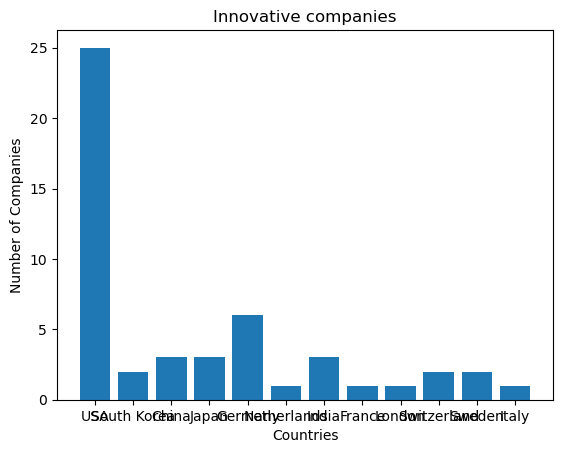

In [26]:
companies_df = pd.DataFrame({"countries": ["USA", "South Korea", "China", "Japan", "Germany", "Netherlands", "India", "France", "London", "Switzerland", "Sweden", "Italy"],
             "companies": [25, 2, 3, 3, 6, 1, 3, 1, 1, 2, 2, 1]})

companies_df.head()

# add code

plt.bar(companies_df["countries"], companies_df["companies"])

plt.title("Innovative companies")
plt.xlabel("Countries")
plt.ylabel("Number of Companies")

plt.show()

<a name="p2.4"></a>

---
### **Part 2.4: Improving Visualizations [OPTIONAL]**
---

#### **Problem #2.4.1**

Using the following data, create a line plot.

**Hint:** Your graph should have three distinct lines corresponding to `y1`, `y2`, and `y3`.

In addition:
* Make sure each line is a different color
* Make `y1` a dashed line
* Add a grid to the background and make the background color black
* Add a legend

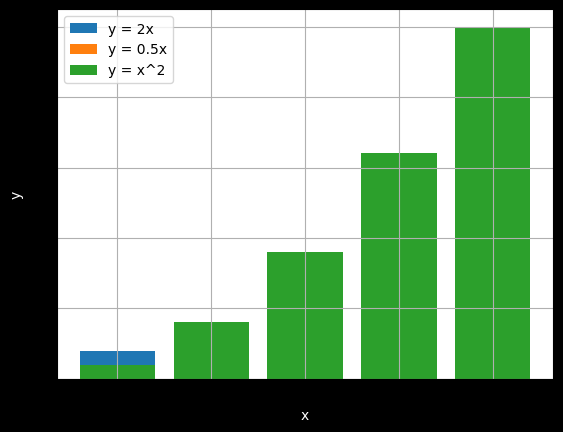

In [28]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10] # y = 2x
y2 = [0.5,1,1.5,2,2.5] # y = 0.5x
y3 = [1,4,9,16,25] # y = x^2

# COMPLETE THE REST OF THE CODE
plt.figure(facecolor = 'black')
plt.bar(x, y1, label = "y = 2x")
plt.bar(x, y2, label = "y = 0.5x")
plt.bar(x, y3, label = "y = x^2")
plt.xlabel('x', color = 'white')
plt.ylabel('y', color = 'white')

plt.grid()

plt.legend()

plt.show()

#### **Problem #2.4.2**

Using the following data, create a scatter plot. In addition:
* Make the data points green
* Change the transparency to 0.6
* Make the x-label `Temperature (Fahrenheit)` and in the font `fantasy`
* Make the y-label `Number of People` and in the font `fantasy`
* Make the title `Number of People at the Beach` and in the font `fantasy`

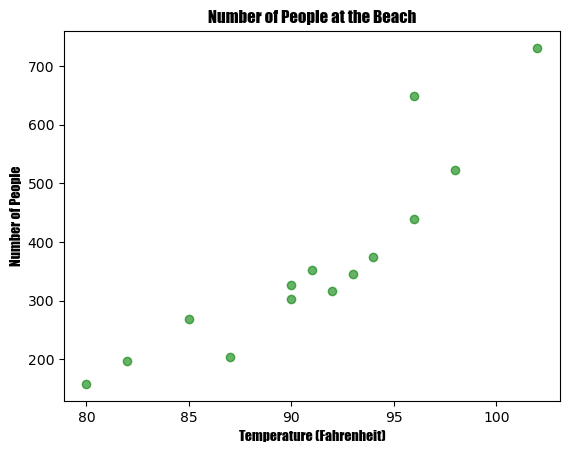

In [29]:
# x axis values
x = [87, 94, 98, 102, 96, 90, 92, 93, 85, 82, 96, 80, 90, 91]
# corresponding y axis values
y = [204, 375, 522, 731, 439, 302, 317, 346, 268, 197, 649, 158, 327, 353]

# COMPLETE THE REST OF THE CODE
plt.scatter(x, y, color="green", alpha=0.6)

plt.xlabel('Temperature (Fahrenheit)', family="fantasy")
plt.ylabel('Number of People', family="fantasy")
plt.title("Number of People at the Beach", family="fantasy")

plt.show()

#### **Problem #2.4.3**

Using the following data, create a bar plot. In addition:
* Make each bar's color the same as the color name
* Make the x-label `Favorite Color` and with a font size of 12
* Make the y-label `Number of People` and with a font size of 12
* Make the title `Number of People vs Favorite Color` and with a font size of 20
* Make the bar width 0.6

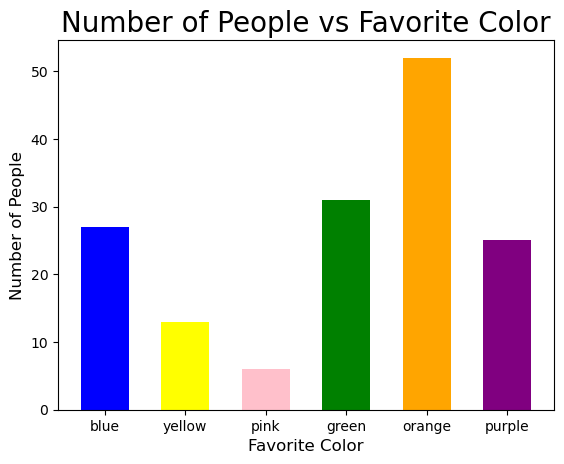

In [30]:
x = ["blue", "yellow", "pink", "green", "orange", "purple"]
# corresponding y axis values
y = [27, 13, 6, 31, 52, 25]

# plotting the points
plt.bar(x, y, width=0.6, color = ["blue", "yellow", "pink", "green", "orange", "purple"])

# add labels and title
plt.xlabel('Favorite Color', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title("Number of People vs Favorite Color", fontsize = 20)

# function to show the plot
plt.show()


#### **Problem #2.4.4**

Using the following data, create a line plot. In addition:
* Make line y1 brown and dashed, and make line y2 pink
* Add a grid to the background
* Add a legend
* Make the title `X vs Y` in font `monospace` and in size 18


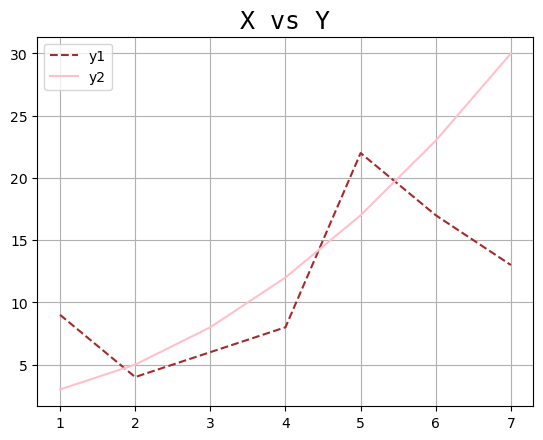

In [31]:
# x axis values
x = [1,2,3,4,5,6,7]
# corresponding y axis values
y1 = [9, 4, 6, 8, 22, 17, 13]
y2 = [3, 5, 8, 12, 17, 23, 30]

# COMPLETE THE REST OF THE CODE
plt.plot(x, y1, label = "y1", ls = "--", color = "brown")
plt.plot(x, y2, label = "y2", color = "pink")

plt.title("X vs Y", family = "monospace", fontsize = 18)

plt.grid()

plt.legend()

plt.show()

#### **Problem #2.4.5**

Create a bar plot for the following data with the following:
* One bar showing the number of females in the dataset and another bar showing the number of males in the dataset.
* Bars labeled 'Female' and 'Male'.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Number of Males and Females in the Dataset" with extra large font.

<br>

**Hint**: You will need to use pandas functions to get the count of males and females in the data frame.

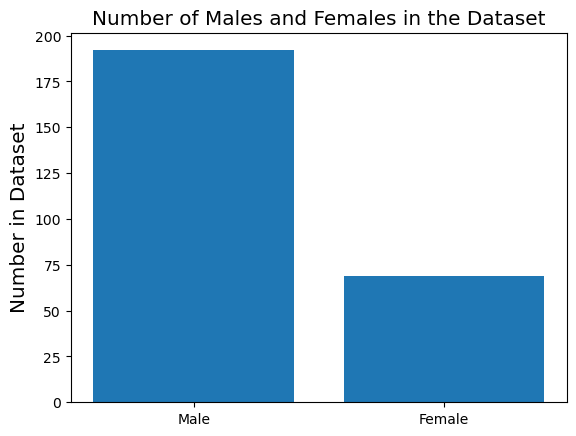

In [32]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)
df.head()

# COMPLETE THE REST OF THE CODE

plt.bar(['Male', 'Female'], df['sex'].value_counts())

plt.ylabel('Number in Dataset', fontsize = 'x-large')
plt.title('Number of Males and Females in the Dataset', fontsize = 'x-large')
plt.show()

#### **Problem #2.4.6**

Create a *grouped* bar plot for the following data with the following:
* One bar graph showing the number of females with heart attacks and without in the dataset.
* This bar graph should be labeled 'Female' for the legend.
* Another bar graph showing the number of males with heart attacks and without in the dataset.
* This bar graph should be labeled 'Male' for the legend.
* Both bar graphs should be located on the x-axis and given a width to make the graph readable.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Breakdown of Heart Attacks by Sex" with extra large font.

<br>

**Hint**: You will need to use pandas functions and comparisons to get the count of males and females with and without heart attacks in the data frame.

In [ ]:
df_female = df[# COMPLETE THIS LINE
df_male = df[# COMPLETE THIS LINE

# COMPLETE THE REST OF THIS CODE

plt.xticks(ticks = [0, 1], labels = ['No Heart Attack', 'Heart Attack'], fontsize = 'x-large')

plt.# COMPLETE THIS LINE

#### **Comment on this Dataset**

This is an unfortunately common case of biased data, specifically *unbalanced data*, leading to potentially harmful results. We could attempt removing `'Sex'` as a feature to blind any ML models to the sex of the patient. However, bias often runs deeper than the most superficial variables and may be correlated with others in ways that humans and especially advanced ML algorithms can still pick up on. Consider some of the following ideas for improving on these results:

* Using statistical methods for balancing the data. For instance, upsampling and downsampling are common first approaches to tackling this problem.

* Find a dataset that is more balanced to begin with. In an ideal world, we would make sure that the data is balanced (representative) upon collection.

<a name="p3"></a>

---
## **Part 3: Linear Regression**
---

Using the  dataset, do the following:
* Build a model that can predict the total number of bike rentals.
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results.

<br>

The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [33]:
# Import required libraries
import urllib.request
import zipfile

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True).drop(columns = ['instant', 'dteday', 'casual', 'hr'])




#### **Step #2: Choose your Variables**

We are using all available features to predict `cnt`.


In [48]:
inputs =bikes_df.drop(columns=['cnt'],axis=1) # COMPLETE THIS CODE
output = bikes_df['cnt']# COMPLETE THIS CODE

#### **Step #3: Split your Data**


In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs,output,test_size=0.2,random_state=42) # COMPLETE THIS CODE

#### **Step #4: Import an ML Algorithm**




In [50]:
# COMPLETE THIS CODE
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the Model**


In [51]:
model = LinearRegression() # COMPLETE THIS CODE

#### **Step #6: Fit, Test, and Visualize**


In [52]:
model.fit(X_train, y_train)# COMPLETE THIS CODE

LinearRegression()

In [53]:
predictions = model.predict(X_test) # COMPLETE THIS CODE

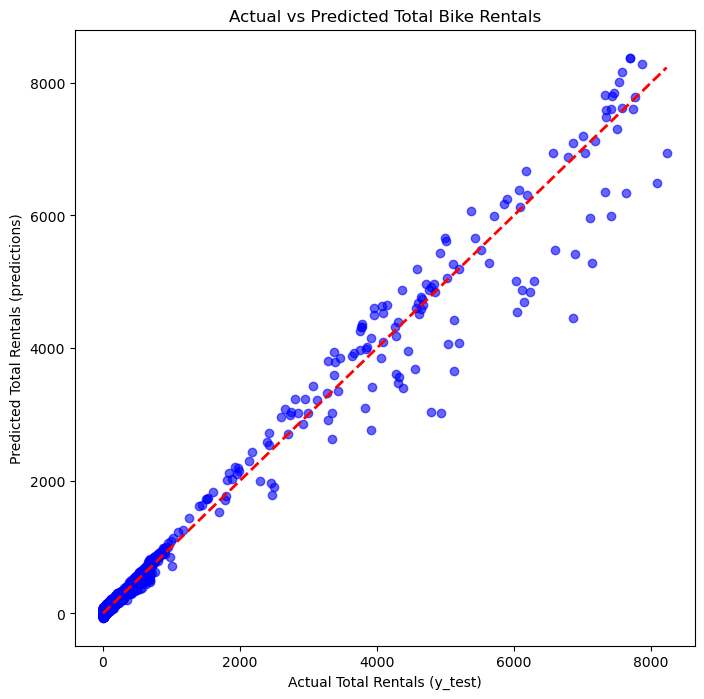

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Total Rentals (y_test)')
plt.ylabel('Predicted Total Rentals (predictions)')
plt.title('Actual vs Predicted Total Bike Rentals')
plt.show()

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, evaluate the model using our standard regression metrics: $R^2$, MSE, and MAE.


In [55]:
# COMPLETE THIS CODE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.979477888566465
MSE: 19319.80420306061
MAE: 50.682242237025385


#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [36]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

# Convert class values to more meaningful labels
star_map = {0: 'red dwarf', 1: 'brown dwarf', 2: 'white dwarf', 3: 'main sequence', 4: 'super giant', 5: 'hyper giant'}
stars_df['class'] = stars_df['class'].map(star_map)

# Encode color feature so we can use it in our modeling
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
stars_df['color'] = enc.fit_transform(stars_df[['color']]).astype(int)



stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,8,red dwarf
1,3042,0.000500,0.1542,8,red dwarf
2,2600,0.000300,0.1020,8,red dwarf
3,2800,0.000200,0.1600,8,red dwarf
4,1939,0.000138,0.1030,8,red dwarf


#### **Step #2: Choose your Variables**



In [37]:
inputs = stars_df.drop(columns=['class'], axis=1)# COMPLETE THIS CODE
output =stars_df['class'] # COMPLETE THIS CODE
inputs

,temperature,brightness,size,color
0,3068,0.002400,0.1700,8
1,3042,0.000500,0.1542,8
2,2600,0.000300,0.1020,8
3,2800,0.000200,0.1600,8
4,1939,0.000138,0.1030,8
...,...,...,...,...
235,38940,374830.000000,1356.0000,0
236,30839,834042.000000,1194.0000,0
237,8829,537493.000000,1423.0000,9
238,9235,404940.000000,1112.0000,9


#### **Step #3: Split your Data**


In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs,output,test_size=0.2,random_state=42) # COMPLETE THIS CODE# COMPLETE THIS CODE

#### **Step #4: Import an ML Algorithm**




In [39]:
# COMPLETE THIS CODE
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the Model**

Use K = 5 here.

In [40]:
model = KNeighborsClassifier(n_neighbors=5)# COMPLETE THIS CODE

#### **Step #6: Fit and Test**


In [41]:
model.fit(X_train, y_train) # COMPLETE THIS CODE

KNeighborsClassifier()

In [42]:
predictions = model.predict(X_test)# COMPLETE THIS CODE

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


In [43]:
print(accuracy_score(y_test,predictions)) # COMPLETE THIS CODE

0.6666666666666666


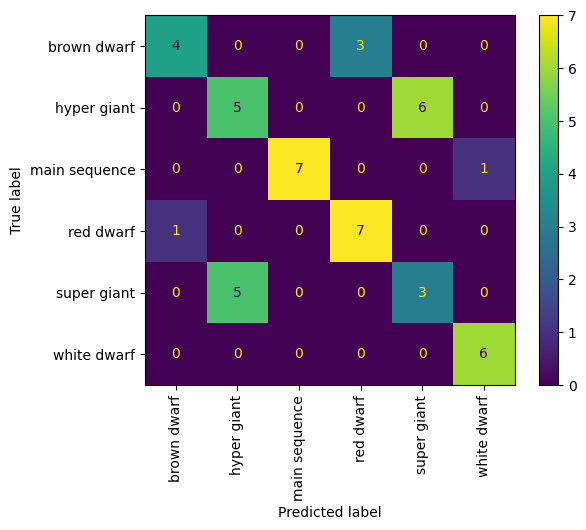

In [44]:
#cm = confusion_matrix(# COMPLETE THIS CODE
#disp = ConfusionMatrixDisplay(# COMPLETE THIS CODE
cm = confusion_matrix(y_test, predictions, labels=model.classes_)# COMPLETE THIS CODE
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.xticks(rotation=90)
plt.show()

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


The stars' `temperature`, `brightness`, `size`, and `color` are as follows:

1. `10500`, `107200`, `240`, `6`.

2. `10500`, `107200`, `240`, `0`.

3. `1900`, `0.0001`, `0.01`, `3`.

4. `9000`, `100`, `10`, `3`.

In [96]:
#new_star=pd.Dataframe(# COMPLETE THIS CODE

new_star = pd.DataFrame([[10500, 107200, 240,6]], columns= X_train.columns)
new_pred = model.predict(new_star)
print(new_pred)

['hyper giant']


In [46]:
new_star = pd.DataFrame([[10500, 107200, 240,0]], columns= X_train.columns)
new_pred = model.predict(new_star)
print(new_pred)# COMPLETE THIS CODE

['hyper giant']


In [47]:
new_star = pd.DataFrame([[1900, 0.0001, 0.01,3]], columns= X_train.columns)
new_pred = model.predict(new_star)
print(new_pred)# COMPLETE THIS CODE

['red dwarf']


In [45]:
new_star = pd.DataFrame([[9000, 100, 10,3]], columns= X_train.columns)
new_pred = model.predict(new_star)
print(new_pred)# COMPLETE THIS CODE

['main sequence']


#### **NOTE**: We encourage you to try working through this section with logistic regression too.

---
#End of Notebook

© 2024 The Coding School, All rights reserved